# Desafio Bank Marketing

Dados: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

Wagner Massayuki Nakasuga

Com o aumento da concorrência, ao longo do tempo, as empresas tiveram que investir em campanhas de marketing para a venda de seus produtos e/ou serviços. Uma das formas de se melhorar essa estratégia é analisando o perfil de seus clientes e  contatos anteriormente realizados. A base de dados "Bank Marketing" possui essas características, desta forma ela será utilizada nesse projeto. Ela é divida em 3 categorias; a primeira é sobre os dados dos clientes:
 - age: idade;
 - job: emprego;
 - marital: estado civil;
 - education: nível de escolaridade;
 - default: possui incumprimento de crédito (sim, não ou não sabe);
 - balance: média do balanço anual, em euros;
 - housing: possui empréstimo imobiliário ou não;
 - loan: possui empréstimo pessoal ou não;
 
 a segunda é sobre os dados relacionados do último contato da campanha atual:
 - contact: tipo de comunicação (celular, telefone ou não sabe);
 - day: dia do último contato do mês;
 - month: mês do último contato do ano;
 - duration: duração da ligação em segundos;
 
 e a terceira é sobre outros atributos:
 - campaign: número de contatos feitos nesta campanha e para este cliente;
 - pdays: número de dias passados depois do último contato da campanha anterior;
 - previous: número de contatos feitos antes desta campanha e para este cliente;
 - poutcome: resultado da campanha feita anteriormente;
 
 Também possui uma variável de saída, y, que reresenta se o cliente aderiu o depósito a prazo ou não.
 
A partir desses dados serão respondidas as seguintes questões:
 
Questão 1: Qual a profissão tem mais tendência a fazer um empréstimo? De qual tipo?
 
Questão 2: Fazendo uma relação entre números de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
 
Questão 3: Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
 
Questão 4: O resultado da campanha anterior tem relevância na campanha atual?
 
Questão 5: Qual o fator determinante para que o banco exija um seguro de crédito?
 
Questão 6: Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
 

In [1]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importando os dados
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Explorando a base de dados

In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


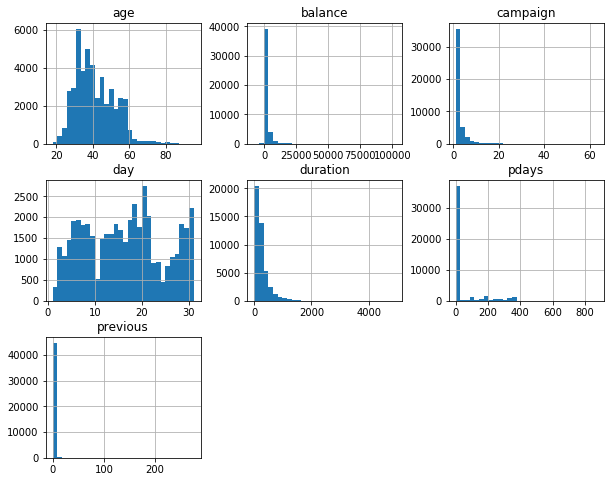

In [8]:
df.hist(bins=30, figsize=(10,8));

Essa base de dados possui 45211 registros com 17 características cada um, sendo que são encontradas variáveis tanto categóricas como numéricas. Não foram encontrados dados faltantes e nem linhas duplicadas. Dos dados mais relevantes, temos que: a média de idades foi de aproximadamente 41 anos, porém com uma distribuição de dados muito grande, no qual a idade do mais novo é 18 e o mais velho 95 anos; O balanço das pessoas, em sua maioria, se encontra próximo a 0; O número de contatos realizados pelo banco variou de 1 a 65, com média próxima a 3; e a duração das ligações durou de 0 a 4918 segundos. Para todos os casos, observam-se desvios padrões elevados devido as grandes distribuições que os dados apresentam. 

Essa foi uma breve, porém importante, análise inicial dos dados. Agora será iniciado a resolução das questões.

# Questão 1: Qual a profissão tem mais tendência a fazer um empréstimo? De qual tipo?
O banco de dados apresenta dois tipos de empréstimos: o pessoal e o imobiliário. Sendo assim, será criado um filtro para que apareçam apenas os clientes que tenham pelo menos um empréstimo.

In [9]:
emprestimo = df.query("loan == 'yes' or housing == 'yes'")
emprestimo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [10]:
emprestimo.shape

(28007, 17)

Agora, verificando quantas vezes cada profissão aparece no atributo "emprestimo".

In [11]:
emprestimo.job.value_counts()

blue-collar      7599
management       5225
technician       4608
admin.           3569
services         3063
entrepreneur     1016
self-employed     864
retired           699
unemployed        589
housemaid         490
student           257
unknown            28
Name: job, dtype: int64

Observa-se da tabela acima que os trabalhadores blue-collar ou trabalhadores manuais, são os que mais fazem empréstimos. Para saber qual é o tipo de empréstimo mais usual entre eles, os dados de "emprestimo" serão novamente filtrados para que permaneçam apenas os registros desses trabalhadores.

In [12]:
collar = emprestimo.query("job == 'blue-collar'")

print('Empréstimo pessoal:\n', collar.loan.value_counts())
print('\n')
print('Empréstimo imobiliário:\n', collar.housing.value_counts())


Empréstimo pessoal:
 no     5915
yes    1684
Name: loan, dtype: int64


Empréstimo imobiliário:
 yes    7048
no      551
Name: housing, dtype: int64


Considerando a análise feita, pode-se concluir que os trabalhadores que tendem a fazer mais empréstimos são os blue-collar ou trabalhadores manuais e o tipo de empréstimo que mais fazem é o imobiliário.

# Questão 2: Fazendo uma relação entre números de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
Para responder a essa questão, primeiramente, o banco de dados será filtrado permancendo apenas os registros que aderiram à campanha.

In [13]:
deposito = df.query("y == 'yes'")
deposito.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


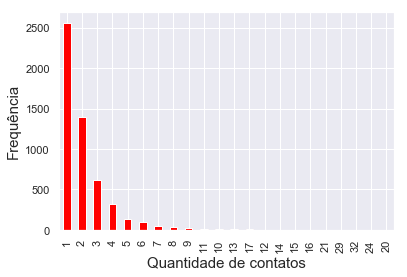

In [14]:
sns.set(style="darkgrid")
ax = deposito.campaign.value_counts().plot(kind='bar', color='red')
ax.set_xlabel('Quantidade de contatos', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15);

Através do gráfico acima, percebe-se que apenas uma ligação foi o suficiente para pegar quase a metade das pessoas que aderiram à campanha. Duas ligações correspondem a quase metade da primeira e assim consecutivamente até a seis ligações, onde a partir dela não é mais perceptível a adesão dos clientes à campanha.

Como uma ligação foi a mais representativa, será feito mais um filtro apenas considerando essa ligação. Inicialmente, serão analisados os dados com variáveis categóricas.

### Trabalho

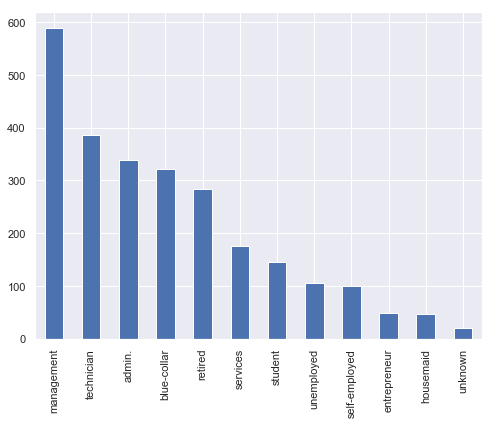

In [15]:
camp_1 = deposito.query("campaign == 1")

camp_1.job.value_counts().plot(kind='bar', figsize=(8,6));

Pode-se ver que os clientes com cargos de gerência foram os que mais aderiram à campanha com apenas uma ligação, seguidos dos técnicos e administradores. As donas de casa foram as que menos aderiram ao plano nessa condição.

### Estado civil

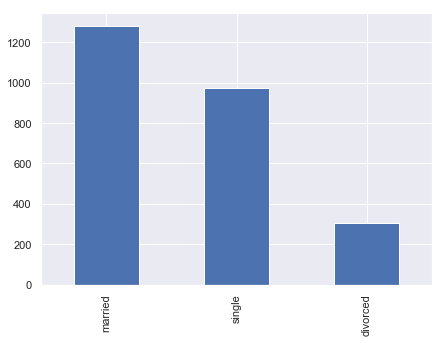

In [16]:
camp_1.marital.value_counts().plot(kind='bar', figsize=(7,5));

Pessoas casadas foram as que mais aderiram à campanha com apenas uma ligação, seguidos dos solteiros e divorciados, respectivamente.

### Escolaridade

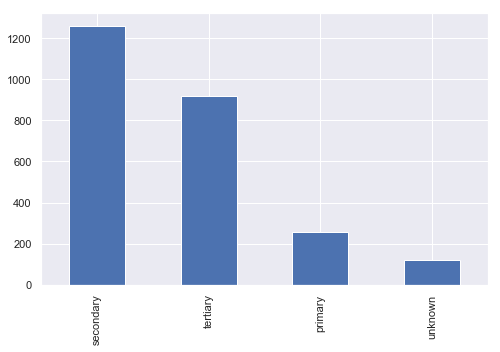

In [17]:
camp_1.education.value_counts().plot(kind='bar', figsize=(8,5));

As pessoas com ensino médio foram as que mais aderiram à campanha com apenas uma ligação, não muito distante as pessoas com ensino superior e em uma quantidade bem menor, os clientes com ensino fundamental e os sem informação de escolaridade.

### Problemas com crédito

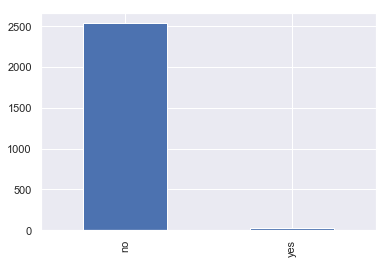

In [18]:
camp_1.default.value_counts().plot(kind='bar', figsize=(6,4));

Os clientes sem problemas de crédito foram os que, de uma forma muito evidente, mais aderiram à campanha com apenas uma ligação.

### Empréstimo imobiliário

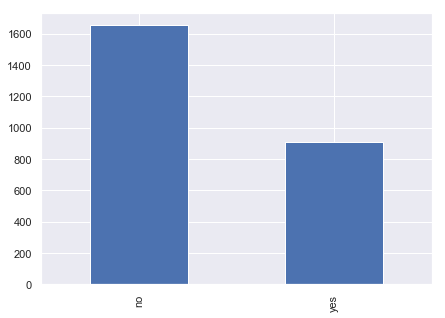

In [19]:
camp_1.housing.value_counts().plot(kind='bar', figsize=(7,5));

Quase o dobro dos clientes que não possuem empréstimo imobiliário aderiram à campanha com apenas uma ligação.

### Empréstimo pessoal

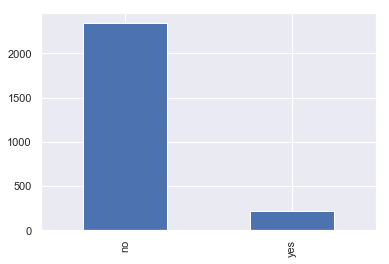

In [20]:
camp_1.loan.value_counts().plot(kind='bar', figsize=(6,4));

A maioria das pessoas sem empréstimo pessoal aderiram à campanha com apenas uma ligação.

### Forma de contato

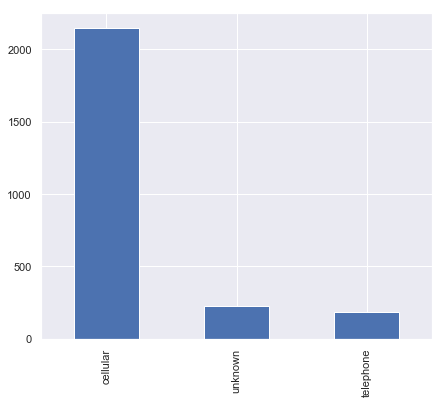

In [21]:
camp_1.contact.value_counts().plot(kind='bar', figsize=(7,6));

Praticamente, todos os contatos com sucesso foram feitas pelo celular. E para terminar as análises com os dados das variáveis categóricas, o último item a ser observado é o contato feito da campanha anterior.

### Campanha anterior

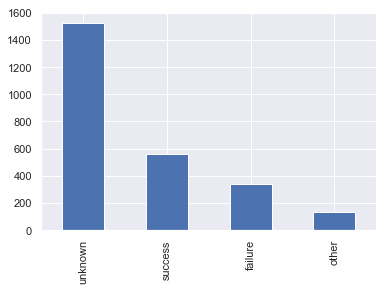

In [22]:
camp_1.poutcome.value_counts().plot(kind='bar', figsize=(6,4));

Em geral, a quantidade de clientes sem informação do resultado da campanha anterior, e que aderiram a essa com apenas uma ligação, predominaram de tal forma que a soma dos demais não chega a ser o total dela.

Agora analisando as variáveis numéricas através de gráficos de dispersão, temos que:

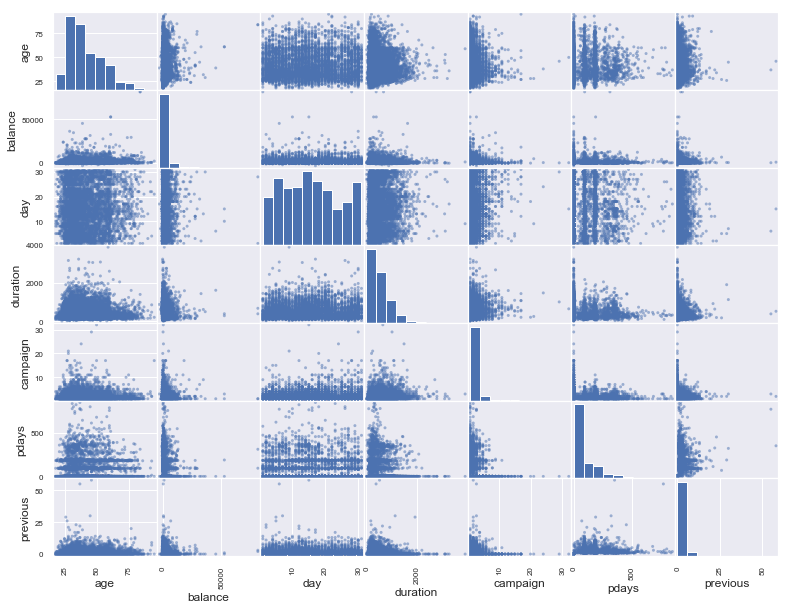

In [23]:
pd.plotting.scatter_matrix(deposito, figsize=(13,10));

Considerando os gráficos acima, para esta questão, somente importará analisar a linha de 'campaign'. Temos que o gráfico de 'day' pouco importa para a análise, sendo assim o foco será dado apenas as outras informações. Para as idades, tem-se que, para aderirem à campanha, foram necessários mais ligações com as pessoas mais jovens (com aproximadamente 30 anos) do que para com as mais velhas, isso se considerarmos que somente após o último contato que o cliente aderiu à campanha. Quanto ao balanço, é possível observar que quanto mais positivo ele se mostrou, menos ligações foram necessárias para os clientes aderirem à campanha.
Do tempo das ligações, a quantidade de até 10 contatos se mostrou efetivo dentro da duração até aproximadamente 1800 segundos. Uma observação que pode ser feita do 'pdays' é que como as pessoas já tinham participado da campanha passada, não precisaram de tantos contatos para aderirem, algo menor do que aproximadamente 3.

De uma forma geral, não foram necessárias muitas ligações para que os clientes aderissem à campanha. Outra observação importante é que quem aderiu possuía um poder econômico mais elevado.

# Questão 3: Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

Essa pergunta será respondida utilizando o atributo 'deposito' gerado na questão 2, isso porque todos os dados dele são das pessoas que aderiram a campanha. Combinando os número de clientes que aderiram à campanha com a quantidade de vezes que foram contactadas, pode-se obter o seguinte gráfico: 

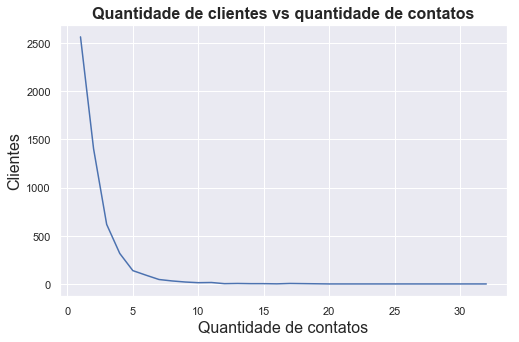

In [24]:
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
ax=sns.lineplot(data=deposito.campaign.value_counts())
plt.title('Quantidade de clientes vs quantidade de contatos', fontsize=16, fontweight='bold')
ax.set_ylabel('Clientes', fontsize=16)
ax.set_xlabel('Quantidade de contatos', fontsize=16);

In [25]:
print('Valor médio de clientes que aderiram à campanha:',deposito.campaign.value_counts().mean())

Valor médio de clientes que aderiram à campanha: 240.4090909090909


Pelo gráfico gerado acima, observa-se que o final do "joelho" está em 6 ligações. Desta forma, ligações acima dessa quantidade  não fornece resultados relevantes, então pode-se dizer que esse seria o número de ligações máximas a se fazer as pessoas. De acordo com a média de clientes que aderiram à campanha, ou seja ~240, o número de ligações fica entre 4 e 5, entretanto mais próximo de 4 (~317). O valor de 4 ligações é bem representativo como visto no gráfico acima e fica próximo à média de clientes que aderiram a campanha, sendo assim este é um bom valor para ser considerado como um valor médio de ligações.

# Questão 4: O resultado da campanha anterior tem relevância na campanha atual?
Para essa questão, primeiro serão analisados os clientes que aderiram tanto a campanha anterior quanto a atual. Em seguida, será a vez dos clientes que recusaram a campanha anterior, mas aceitaram a atual.

In [26]:
contatados = df.query("pdays != -1") # sobraram todos menos os nao contatados antes
contatados_aderiram = contatados.query("y == 'yes'") # Apenas o sque aderiram a cmapanha atual
contatados_sucesso_aderiram = contatados_aderiram.query("poutcome == 'sucesso'") #Apenas os que aderiram as duas campanhas

In [27]:
contatados_sucesso_aderiram.count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
contatados_falharam_aderiram = contatados_aderiram.query("poutcome == 'failure'")
contatados_falharam_aderiram.count()

age          618
job          618
marital      618
education    618
default      618
balance      618
housing      618
loan         618
contact      618
day          618
month        618
duration     618
campaign     618
pdays        618
previous     618
poutcome     618
y            618
dtype: int64

In [29]:
contatados_aderiram.shape

(1905, 17)

Tem-se que, os clientes que aderiram à campanha anterior não aderiram a atual, possivelmente por já terem o produto que estão oferecendo agora. E dos que não aderiram à campanha anterior, 618 aceitaram a atual e outros 1287 contactados na campanha anterior aderiram a nova campanha, mas não se tem conhecimento do resultado da anterior (unknown e other). Considerando-se que o número de contactados anteriormente foi de 8257 e que 1905 aderiram à campanha atual, temos uma proporção de aproximadamente 23% de resultado positivo. Agora, para saber se a campanha anterior teve realmente um resultado positivo na campanha atual, é necessário verificar os clientes que não foram contactados na campanha anterior, sendo assim todo a análise será refeita, mas desta vez visando apenas esse público.

In [30]:
n_contatados = df.query("pdays == -1") #Todos os que não foram contactados anteriormente
n_contatados_aderiram = n_contatados.query("y == 'yes'")# Todos desse novo grupo que aderiram a campanha atual
n_contatados_n_aderiram = n_contatados.query("y == 'no'")# Todos desse novo grupo que nao aderiram a campanha atual

In [31]:
print(n_contatados.shape)
print(n_contatados_aderiram.shape)
print(n_contatados_n_aderiram.shape)

(36954, 17)
(3384, 17)
(33570, 17)


Temos que desse novo grupo 3384 clientes aderiram à campanha atual e 33570 recusaram. Desta forma, apenas 9% desse novo grupo aderiu ao produto atual. Considerando que o grupo anterior (pessoas contactadas anteriormente) obteve 23% de pessoas que aderiram à atual campanha e que somente 9% do novo grupo (não contactadas anteriormente) aderiu, pode-se concluir que a campanha anterior teve relevância no resultado da campanha atual.

#### Antes de iniciar a questão 5, duas funções para a geração de gráficos serão definidas agora.

In [32]:
def box_plot_data(data, title, xticklabel, ylabel, size_ylabel):
    """
    data dados
    title = título,
    xticklabel = sub-tEitulos do eixo x
    ylabel = nome do eixo y
    size_ylabel = tamanho da fonte do eixo y
    """
    data = data
    fig, ax = plt.subplots()
    plt.title(title, fontweight='bold', fontsize=13)
    ax.boxplot(data, patch_artist=True, labels=xticklabel)
    ax.set_ylabel(ylabel, fontsize=size_ylabel)
    plt.show();
    
def pie_plot(nome, dados, cor, corte, titulo):
    """
    nome = rótulo das partes do gráfico
    dados = dados
    cor = cor das partes dos gráficos
    corte = configuração para a separação das partes
    titulo = †eitulo do gráfico
    """
    coluna_default = nome
    data_default = dados
    colors_default = cor
    explode_default = corte
    plt.title(titulo, fontweight='bold')
    plt.pie(data_default,
            explode_default,
            labels=coluna_default,
            colors=colors_default,
            autopct='%1.1f%%',
            shadow=True,
            startangle=140);
    


# Questão 5: Qual o fator determinante para que o banco exija um seguro de crédito?
Para essa questão, inicialmente, algumas colunas referentes a contatos serão retiradas da base de dados. Em seguida, a mesma será dividida em clientes com e sem problemas de crédito.

In [33]:
#colunas desnecessarias
df.drop('contact', axis=1, inplace=True)
df.drop('day', axis=1, inplace= True)
df.drop('month', axis=1, inplace= True)
df.drop('duration', axis=1, inplace= True)
df.drop('campaign', axis=1, inplace= True)
df.drop('pdays', axis=1, inplace= True)
df.drop('previous', axis=1, inplace= True)
df.drop('poutcome', axis=1, inplace= True)

In [34]:
credit_default = df.query("default == 'yes'") #clientes com problema de credito
n_credit_default =df.query("default == 'no'")#clientes sem problema de credito

Para saber qual o fator determinante para que o banco exija um seguro de crédito, cada coluna de cada novo banco de dados (credit_default e n_credit_default) será analisada individualmente. Começando pela idade dos clientes.

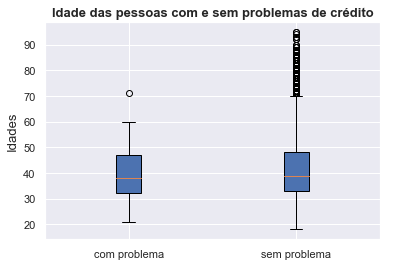

In [35]:
box_plot_data([credit_default.age, n_credit_default.age],
              'Idade das pessoas com e sem problemas de crédito',
              ['com problema', 'sem problema'],
              'Idades',
              13)

Aparentemente as informações de idade das pessoas com e sem crédito são parecidas, desta forma não demonstra um fator determinante para o seguro de crédito.

A análise seguinte é em relação ao emprego.

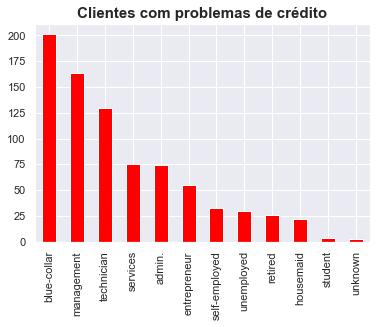

In [36]:
credit_default.job.value_counts().plot(kind='bar', color='red')
plt.title("Clientes com problemas de crédito", fontsize=15, fontweight='bold')
plt.show();

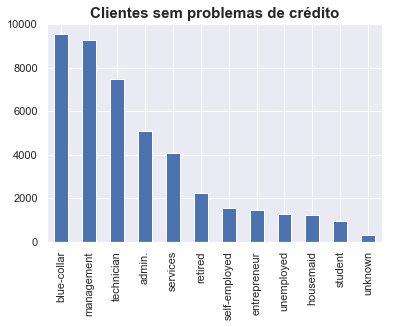

In [37]:
n_credit_default.job.value_counts().plot(kind='bar')
plt.title("Clientes sem problemas de crédito", fontsize=15, fontweight='bold')
plt.show();

Comparando-se os dois gráficos acima, não é possível dizer que a profissão é um fator determinante para que o banco exija um seguro de crédito. Isso pode ser concluído, pois com algumas exceções, todas as profissões permaneceram nas mesmas posições entre um gráfico e outro. Isso significa que, por exemplo, os profissionais de trabalhos manuais que são os que mais possuem problemas de crédito também são os que menos possuem quando os dados são divididos entre os que tem e não tem problemas de crédito.

A seguir, serão analisados os clientes pelo seus estados civis.

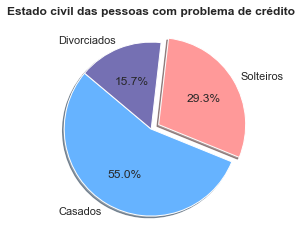

In [38]:
pie_plot(['Casados', 'Solteiros', 'Divorciados'],
         credit_default.marital.value_counts(),
         ['#66b3ff', '#ff9999', '#7570b3'],
          (0, 0.1,0),
          'Estado civil das pessoas com problema de crédito')

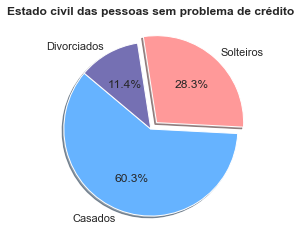

In [39]:
pie_plot(['Casados', 'Solteiros', 'Divorciados'],
         n_credit_default.marital.value_counts(),
         ['#66b3ff', '#ff9999', '#7570b3'],
          (0, 0.1,0),
          'Estado civil das pessoas sem problema de crédito')

Dos gráficos acima, pode-se observar que não existe uma grande diferença entre as pessoas com e sem problemas de crédito em relação aos seus estados civis. O estado civil que apresenta uma maior diferença são os casados, no qual eles são aproximadamente 5% melhores pagadores, mesmo assim ainda não se pode dizer que isso é um fator determinante para que o banco exija um seguro de crédito.

Agora, analisando a escolaridade dos clientes.

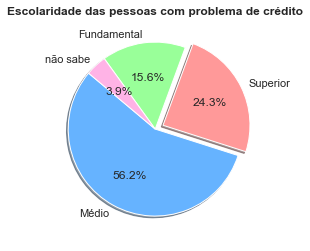

In [40]:
pie_plot(['Médio', 'Superior', 'Fundamental', 'não sabe'],
         credit_default.education.value_counts(),
         ['#66b3ff', '#ff9999', '#99ff99', '#ffb3e6'],
          (0,0.1,0,0),
          'Escolaridade das pessoas com problema de crédito')

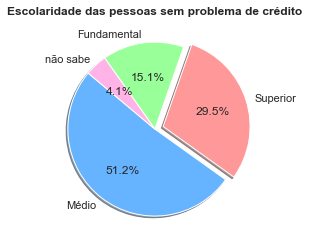

In [41]:
pie_plot(['Médio', 'Superior', 'Fundamental', 'não sabe'],
         n_credit_default.education.value_counts(),
         ['#66b3ff', '#ff9999', '#99ff99', '#ffb3e6'],
          (0,0.1,0,0),
          'Escolaridade das pessoas sem problema de crédito')

Comparando-se os dois gráficos acima, é possível observar uma grande similaridade entre eles, a única diferença visível é o aumento de clientes com ensino superior sem problemas de crédito e uma redução no médio do primeiro para o segundo gráfico. Essa diferença apresentada ainda não é o suficiente para ser considerada como um fator determinante do banco exijir um seguro de crédito.

O próximo item a ser observado será o empréstimo pessoal.

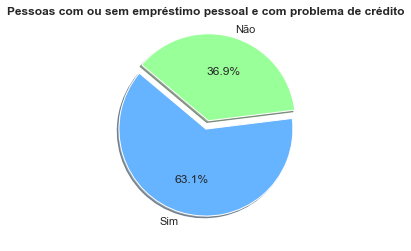

In [42]:
pie_plot(['Sim', 'Não'],
         credit_default.loan.value_counts(),
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Pessoas com ou sem empréstimo pessoal e com problema de crédito')

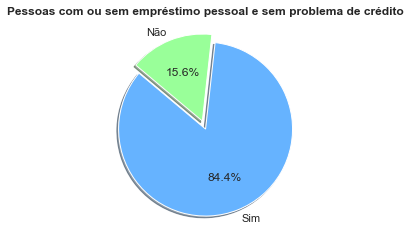

In [43]:
pie_plot(['Sim', 'Não'],
         n_credit_default.loan.value_counts(),
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Pessoas com ou sem empréstimo pessoal e sem problema de crédito')

Na comparação entre os dois gráficos acima, as pessoas com empréstimo pessoal e sem problemas de crédito superam as que não tem possuem problemas de crédito e também não possuem empréstimo pessoal. Em uma proporção um pouco menor, isso também ocorre para os clientes com problemas de crédito.

A análise seguinte, será feita com os dados dos clientes com ou sem empréstimo imobiliário.

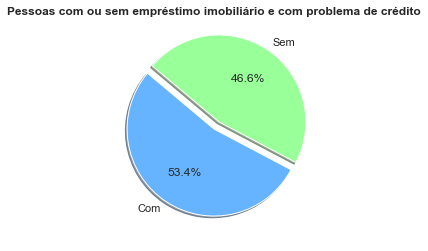

In [44]:
credit_default.housing.value_counts()
pie_plot(['Com', 'Sem'],
         credit_default.housing.value_counts(),
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Pessoas com ou sem empréstimo imobiliário e com problema de crédito')

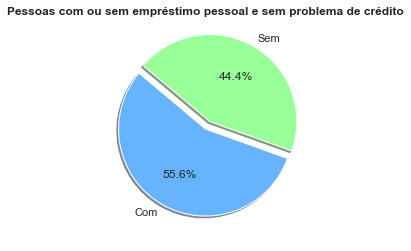

In [45]:
n_credit_default.housing.value_counts()
pie_plot(['Com', 'Sem'],
         n_credit_default.housing.value_counts(),
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Pessoas com ou sem empréstimo pessoal e sem problema de crédito')

Proporcionalmente falando, a diferença entre os dois gráficos acima é pequena demais para ser um fator determinante para que um banco exija um seguro de crédito. Desta forma, a variável empréstimo imobiliário está descartada dessa hipótese.

Agora será analisado o balanço. Devido a distribuição de valores do balanço ser muito grande, a base de dados será dividida em duas partes: uma representando o número de registros menores do que zero e a outra maior ou igual a zero.

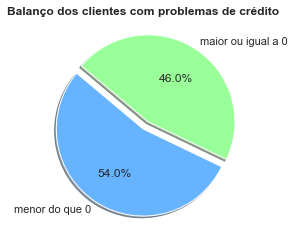

In [46]:
credit_default.query("balance < 0").count() # valor de 440
credit_default.query("balance >= 0").count() # valor de 375

pie_plot(['menor do que 0', 'maior ou igual a 0'],
         [440, 375],
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Balanço dos clientes com problemas de crédito')

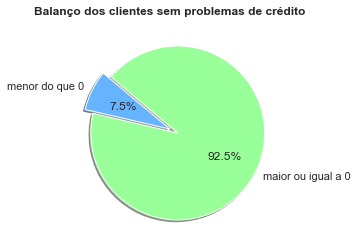

In [47]:
n_credit_default.query("balance < 0").count() # valor de 3326
n_credit_default.query("balance >= 0").count() # valor de 41070

pie_plot(['menor do que 0', 'maior ou igual a 0'],
         [3326, 41070],
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Balanço dos clientes sem problemas de crédito')

Comparando-se os dois gráficos, é possível verificar uma grande inversão dos valores do primeiro para o segundo gráfico. Isso significa que as pessoas que possuem balanço positivo ou zero tendem a não possuírem problemas com crédito, e pessoas com balanço negativo tendem a possuírem problemas com crédito. Claro que no caso do primeiro gráfico a proporcão está próxima de 1:1, porém no segundo gráfico essa proporção de pessoas com balanço positivo supera em muito as que estão com balanço negativo. Desta forma, pode-se dizer que o balanço médio anual dos clientes é um fator determinante para o banco exijir um seguro de crédito.

Só para completar, será feita a análise do item y.

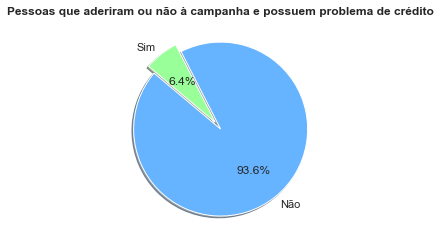

In [48]:
pie_plot(['Não', 'Sim'],
         credit_default.y.value_counts(),
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Pessoas que aderiram ou não à campanha e possuem problema de crédito')

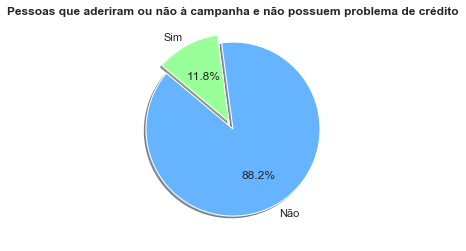

In [49]:
pie_plot(['Não', 'Sim'],
         n_credit_default.y.value_counts(),
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Pessoas que aderiram ou não à campanha e não possuem problema de crédito')

Comparando-se os dois gráficos, não é possível afirmar apenas observando se a pessoa aderiu ou não à campanha atual que ela terá problemas de crédito. Sendo assim, esse não é um fator determinante para que o banco exija um seguro de crédito. 

Em princípio, o fator determinante é o balanço anual do cliente. Isso foi verificado comparando-se os gráficos referentes aos balanços, no qual foi observado que os que não possuiam problemas de crédito, em sua maioria, eram os que possuíam balanço positivo. Para verificar se isso faz sentido, será feito um treinamento de alguns algoritmos de machine learning para a previsão de algumas pessoas, após a resolução da questão 6.

# Questão 6: Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
Como o empréstimo imobiliário não está diretamente relacioando à campanha anterior, a base de dados com colunas retiradas na questão 5 ainda funciona para esse problema. Desta forma a base de dados será dividida em pessoas com e sem empréstimo imobiliário e as análises serão semelhantes à questão anterior.

In [50]:
housing = df.query("housing == 'yes'")
n_housing = df.query("housing == 'no'")

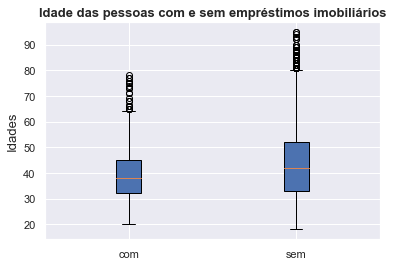

In [51]:
# idades
box_plot_data([housing.age, n_housing.age],
              'Idade das pessoas com e sem empréstimos imobiliários',
              ['com', 'sem'],
              'Idades',
              13)

Analisando os dados de idades dos clientes que possuem ou não empréstimos imobiliários, tem-se que a distribuição de dados das pessoas sem empréstimos é maior, porém nada muito significativo.

A análise seguinte é das profissões que cada cliente exerce.

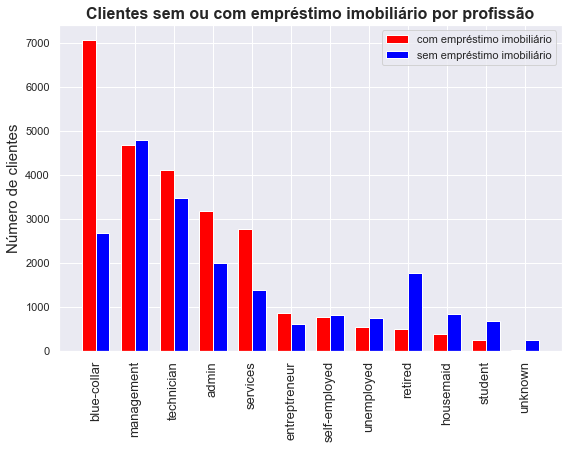

In [52]:
housing_job = [7048, 4678, 4115, 3182, 2766, 869, 765, 543, 491, 398, 249, 26] #valores obtidos de housing.job.value_counts()
n_housing_job = [2684, 4780, 3482, 1989, 1388, 618, 814, 760, 1773, 842, 689, 262]#valores obtidos de n_housing.job.value_counts()
labels_default = ['blue-collar', 'management', 'technician','admin', 
                  'services', 'entreptreneur', 'self-employed', 'unemployed', 
                  'retired', 'housemaid', 'student', 'unknown']
pos = np.arange(12)
tam = .35

fig,ax = plt.subplots(figsize=(9,6))
plt1 = ax.bar(pos-tam/2, housing_job, tam, color='red', label = 'com empréstimo imobiliário')
plt2 = ax.bar(pos+tam/2, n_housing_job, tam, color='blue', label = 'sem empréstimo imobiliário')

ax.set_title('Clientes sem ou com empréstimo imobiliário por profissão',
             fontsize=16,
             fontweight='bold')
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_xticks(pos)
ax.set_xticklabels(labels_default, rotation=90, fontsize=13)
ax.legend();

Do gráfico acima, percebe-se que o número de trabalhadores manuais com empréstimo imobiliário supera os demais profissionais e é mais que o dobro dos da mesma classe, porém sem empréstimo. Dessa forma, esse profissional pode ser considerado como uma característica de um cliente que pede esse tipo de empréstimo.

Agora, o estado civil.

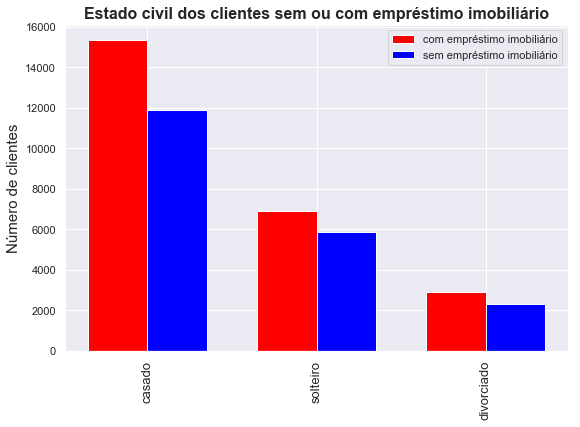

In [53]:
housing_marital = [15321, 6902, 2907] #valores obtidos de housing.marital.value_counts()
n_housing_marital = [11893, 5888, 2300]#valores obtidos de n_housing.marital.value_counts()
labels_default = ['casado', 'solteiro', 'divorciado']
pos = np.arange(3)
tam = .35

fig,ax = plt.subplots(figsize=(9,6))
plt1 = ax.bar(pos-tam/2, housing_marital, tam, color='red', label = 'com empréstimo imobiliário')
plt2 = ax.bar(pos+tam/2, n_housing_marital, tam, color='blue', label = 'sem empréstimo imobiliário')

ax.set_title('Estado civil dos clientes sem ou com empréstimo imobiliário',
             fontsize=16,
             fontweight='bold')
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_xticks(pos)
ax.set_xticklabels(labels_default, rotation=90, fontsize=13)
ax.legend();

Através do gráfico acima, pode-se dizer que os casados são os que mais utilizam e também não utilizam do serviço de empréstimo imobiliário. Considerando o gráfico acima, não é possível afirmar que o estado civil seja uma característica proeminente dos clientes que utilizam desse serviço.

A análise seguinte será a do grau de escolaridade.

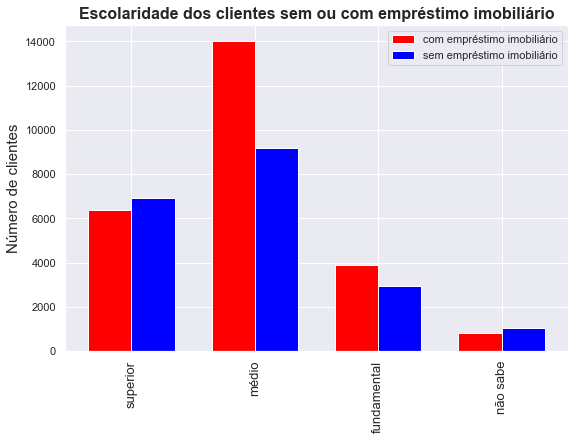

In [54]:
housing_education = [6378, 14038, 3894, 820] #valores obtidos de housing.education.value_counts()
n_housing_education = [6923, 9164, 2957, 1037]#valores obtidos de n_housing.education.value_counts()
labels_default = ['superior', 'médio', 'fundamental', 'não sabe']
pos = np.arange(4)
tam = .35

fig,ax = plt.subplots(figsize=(9,6))
plt1 = ax.bar(pos-tam/2, housing_education, tam, color='red', label = 'com empréstimo imobiliário')
plt2 = ax.bar(pos+tam/2, n_housing_education, tam, color='blue', label = 'sem empréstimo imobiliário')

ax.set_title('Escolaridade dos clientes sem ou com empréstimo imobiliário',
             fontsize=16,
             fontweight='bold')
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_xticks(pos)
ax.set_xticklabels(labels_default, rotation=90, fontsize=13)
ax.legend();

Uma outra característica marcante no gráfico acima é a de que aproximadamente 50% dos clientes que possuem empréstimo imobiliário tem ensino médio, seguido dos que possuem ensino superior e fundamental; os que não sabem foram poucos de tal forma a não serem muito representativos.

Agora, será analisado as pessoas com problema ou não de crédito.

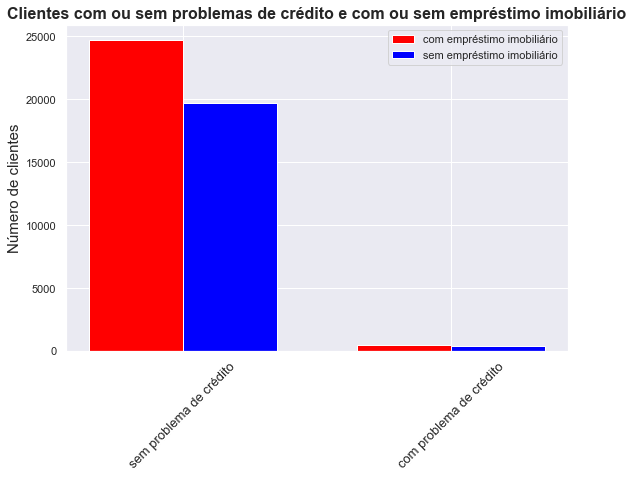

In [55]:
housing_default = [24695, 435] #valores obtidos de housing.default.value_counts()
n_housing_default = [19701, 380]#valores obtidos de n_housing.default.value_counts()
labels_default = ['sem problema de crédito', 'com problema de crédito']
pos = np.arange(2)
tam = .35

fig,ax = plt.subplots(figsize=(9,6))
plt1 = ax.bar(pos-tam/2, housing_default, tam, color='red', label = 'com empréstimo imobiliário')
plt2 = ax.bar(pos+tam/2, n_housing_default, tam, color='blue', label = 'sem empréstimo imobiliário')

ax.set_title('Clientes com ou sem problemas de crédito e com ou sem empréstimo imobiliário',
             fontsize=16,
             fontweight='bold')
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_xticks(pos)
ax.set_xticklabels(labels_default, rotation=45, fontsize=13)
ax.legend();

Observando o gráfico acima, percebe-se que as pessoas sem problema de crédito são as que mais possuem e não possuem empréstimo imobiliário. Sendo assim, não dá para considerar o problema de crédito como uma característica de clientes que possuem empréstimo imobiliário.

Agora analisando os clientes que possuem ou não empréstimo do tipo pessoal, temos:

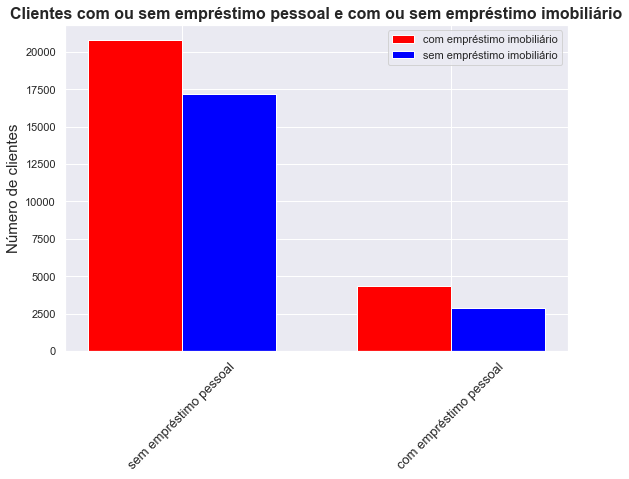

In [56]:
housing_loan = [20763, 4367] #valores obtidos de housing.loan.value_counts()
n_housing_loan = [17204, 2877]#valores obtidos de n_housing.loan.value_counts()
labels_default = ['sem empréstimo pessoal', 'com empréstimo pessoal']
pos = np.arange(2)
tam = .35

fig,ax = plt.subplots(figsize=(9,6))
plt1 = ax.bar(pos-tam/2, housing_loan, tam, color='red', label = 'com empréstimo imobiliário')
plt2 = ax.bar(pos+tam/2, n_housing_loan, tam, color='blue', label = 'sem empréstimo imobiliário')

ax.set_title('Clientes com ou sem empréstimo pessoal e com ou sem empréstimo imobiliário',
             fontsize=16,
             fontweight='bold')
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_xticks(pos)
ax.set_xticklabels(labels_default, rotation=45, fontsize=13)
ax.legend();

Da mesma forma que as pessoas com problemas de crédito, as pessoas com ou sem empréstimo pessoal não podem ser consideradas como uma característica proeminente para os clientes que possuem empréstimo imobiliário.

Agora serão analisados os balanços dos clientes que possuem ou não emprestimo imobiliário. Para isso, o conjunto de dados será dividido em menor do que zero e maior ou igual a zero, da mesma forma que na questão 5.

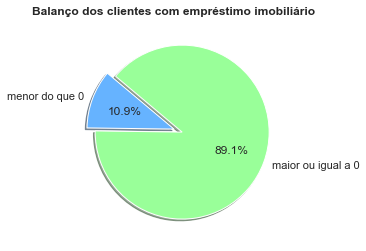

In [57]:
credit_default.query("balance < 0").count() # valor de 2738
credit_default.query("balance >= 0").count() # valor de 22392

pie_plot(['menor do que 0', 'maior ou igual a 0'],
         [2738, 22392],
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Balanço dos clientes com empréstimo imobiliário')

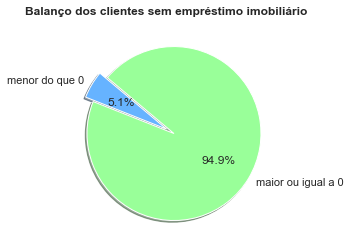

In [58]:
n_credit_default.query("balance < 0").count() # valor de 1028
n_credit_default.query("balance >= 0").count() # valor de 19053

pie_plot(['menor do que 0', 'maior ou igual a 0'],
         [1028, 19053],
         ['#66b3ff', '#99ff99'],
          (0,0.1),
          'Balanço dos clientes sem empréstimo imobiliário')

Diferentemente do que ocorreu na questão 5, aqui a diferença foi de apenas ~5% entre clientes com ou sem empréstimo imobiliário.

E por fim, a análise dos clientes que aderiram à campanha do banco e que possuem ou não empréstimo imobiliário.

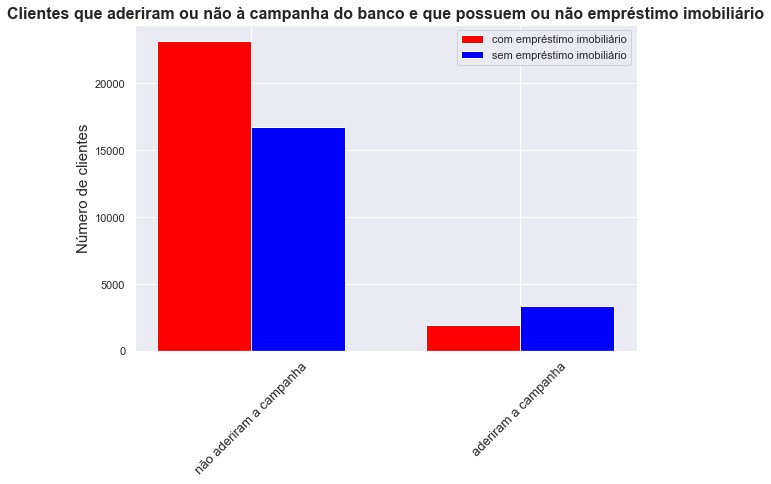

In [59]:
housing_y = [23195, 1935] #valores obtidos de housing.y.value_counts()
n_housing_y = [16727, 3354]#valores obtidos de n_housing.y.value_counts()
labels_default = ['não aderiram a campanha', 'aderiram a campanha']
pos = np.arange(2)
tam = .35

fig,ax = plt.subplots(figsize=(9,6))
plt1 = ax.bar(pos-tam/2, housing_y, tam, color='red', label = 'com empréstimo imobiliário')
plt2 = ax.bar(pos+tam/2, n_housing_y, tam, color='blue', label = 'sem empréstimo imobiliário')

ax.set_title('Clientes que aderiram ou não à campanha do banco e que possuem ou não empréstimo imobiliário',
             fontsize=16,
             fontweight='bold')
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_xticks(pos)
ax.set_xticklabels(labels_default, rotation=45, fontsize=13)
ax.legend();

Uma inversão ocorreu entre os clientes que aderiram e não aderiram à campanha do banco e possuem ou não empréstimo imobiliário. Isso fortalece que uma característica proeminente  das pessoas que possuem empréstimo imobiliário é não terem aderido à campanha atual do banco.

De uma forma geral, as características mais proeminentes de quem possue empréstimo imobiliário são: profissionais manuais (blue-collar), que possuem ensino médio e que não aderiram à campanha de marketing do banco.

# Previsões de registro para a questão 5
Como mencionado no final da questão 5, será feito um treinamento de alguns algortimos para prever se um banco deve ou não exijir seguro de crédito da pessoa.

Inicialmente, a ordem das colunas serão trocadas de tal forma que a variável que queremos prever esteja na última posição.

In [60]:
#mudando a ordem das colunas
df = df[['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'y', 'default']]
df.head()

,age,job,marital,education,balance,housing,loan,y,default
0,58,management,married,tertiary,2143,yes,no,no,no
1,44,technician,single,secondary,29,yes,no,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no,no
3,47,blue-collar,married,unknown,1506,yes,no,no,no
4,33,unknown,single,unknown,1,no,no,no,no


In [61]:
# separando os previsores da classe
previsores = df.iloc[:,0:8].values
classe = df.iloc[:,8].values

In [62]:
# Transofrmando as variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()

previsores[:,1] = labelencoder_previsores.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder_previsores.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder_previsores.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder_previsores.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder_previsores.fit_transform(previsores[:,6])
previsores[:,7] = labelencoder_previsores.fit_transform(previsores[:,7])

In [63]:
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [64]:
# escalonando as variáveis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [65]:
# separando a base de dados em treinamento e teste utilizando amostragem aleatória simples
from sklearn.model_selection import train_test_split
Previsores_treino, previsores_teste, classe_treino, classe_teste = train_test_split(
        previsores, classe, test_size = 0.20, random_state = 0)

In [66]:
#Métrica a ser utilizada
from sklearn.metrics import accuracy_score

#decision tree
from sklearn.tree import DecisionTreeClassifier
classificador_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classificador_dt.fit(Previsores_treino, classe_treino)
previsoes_dt = classificador_dt.predict(previsores_teste)
precisao_dt = accuracy_score(classe_teste, previsoes_dt)

In [67]:
#SVM
from sklearn.svm import SVC
classificador_svm = SVC(kernel = 'linear', random_state = 1)
classificador_svm.fit(Previsores_treino, classe_treino)
previsoes_svm = classificador_svm.predict(previsores_teste)
precisao_svm = accuracy_score(classe_teste, previsoes_svm)

In [68]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classificador_lr = LogisticRegression()
classificador_lr.fit(Previsores_treino, classe_treino)
previsoes_lr = classificador_lr.predict(previsores_teste)
precisao_lr = accuracy_score(classe_teste, previsoes_lr)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
print('Acurácia dos modelos','\n',
      'Decision tree: ', precisao_dt,'\n',
      'SVM: ',precisao_svm, '\n',
     'Logistic Regression: ', precisao_lr)

Acurácia dos modelos 
 Decision tree:  0.9693685723764237 
 SVM:  0.9825279221497291 
 Logistic Regression:  0.9826385049209333


In [70]:
novo = [[32, 9, 1, 1,-100, 0, 1, 0]]
novo = np.asarray(novo)
novo = novo.reshape(-1,1)
novo = scaler.fit_transform(novo)
novo = novo.reshape(-1,8)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [71]:
# Para esse teste será utilizado o algorítmo Decision Tree, porém qualquer um dos 3 faria o mesmo 
# trabalho, já que apresentaram boas acurácias
if classificador_dt.predict(novo) == 0:
    print('O cliente não necessita de seguro')
else:
    print('O cliente necessita de seguro')

O cliente não necessita de seguro


Após alguns teste variando todos os parâmetros, foi percebido que o valor do balanço é o que mais alterna entre o banco precisar exijir seguro de crédito ou não. Desta forma, o balanço é realmente o fator determinante para que o banco exija um seguro de crédito do cliente.

# Apêndice

Para fazer as previsões, os códigos a serem usados referentes a cada coluna são:

- Coluna profissão (job):
       0-management,
       1-technician,
       2-entreptreneur,
       3-blue-collar,
       4-unknown,
       5-retired,
       6-admin.,
       7-services,
       8-self-employed,
       9-housemaid,
       10-unemployed,
       11-student


- Coluna estado civil (marital):
        0-married
        1-single
        2-divorced

- Coluna escolaridade (education):
        0-tertiary
        1-secondary
        2-unknown
        3-primary

- Coluna empréstimo imobiliário (housing):
        0-yes
        1-no

- Coluna empréstimo pessoal:
        0-no
        1-yes

- Coluna resposta - (default)
        0-no
        1-yes